In [1]:
from shutil import ignore_patterns
import numpy
import librosa
import os

import numpy as np

import requests

import time

# Setting values for the observer

# path = "/Users/matt/Projects/msg-backend/tracks"
path = "./test_tracks"

current_tracks = []

currently_scanning = False

accepted_filetypes = ["mp3","wav","aif","flac"]

def round_to_nearest(n, s):
    return np.round(n,decimals = s)

def scanner():
    directory = os.fsencode(path)
    print("Path: " + path)

    incr = 0

    for file in os.listdir(directory):
        print("FILE FOUND")
        file_name = os.fsdecode(file)
        headers = {'Content-Type': 'application/json'}

        r = requests.post("http://localhost:6001/api/check_if_exists", json={
            "fileName": file_name
        }, headers=headers)

        # print("[TRACK] file_name",file_name)
        # print("[TRACK] DOES EXIST RESULT",r.text)
        # print("[TRACK] length", len(r.text))

        split_file_name = file_name.split(".")
        print(split_file_name)

        if split_file_name[len(split_file_name)-1] in accepted_filetypes:
            print("doing")
            if len(r.text) == len(r.text):
                print("DOING IT!")
                # print("[TRACK] Analysing: " + file_name)

                full_name = path + "/" + file_name
                print("[TRACK] full_name: " + full_name) 

                try:
                    x, sr = librosa.load(full_name)
                except EOFError:
                    time.sleep(1)
                    print("[TRACK] End of file error in loading",file_name)
                    print("[TRACK] Restarting scanner")
                    # clear_tracks_db()
                    scanner()
                    break
                except FileNotFoundError:
                    time.sleep(1)
                    print("[TRACK] File not found error in loading",file_name)
                    print("[TRACK] Restarting scanner")
                    # clear_tracks_db()
                    scanner()
                    break         

                if x.all() != None:
                    tempo = librosa.beat.tempo(x, sr=sr)
                    # print("Tempo: " + tempo)

                    genre = ""

                    contrast = librosa.feature.spectral_contrast(x, sr=sr)
                    chroma_stft = librosa.feature.chroma_stft(x, sr=sr)
                    rmse = librosa.feature.rms(x)
                    spec_cent = librosa.feature.spectral_centroid(x, sr=sr)
                    spec_bw = librosa.feature.spectral_bandwidth(x, sr=sr)
                    rolloff = librosa.feature.spectral_rolloff(x, sr=sr)
                    zcr = librosa.feature.zero_crossing_rate(x)
                    mfcc = librosa.feature.mfcc(x, sr=sr)

                    n_f_name = str(incr) + ".npy"
                    np.save("./explo/"+n_f_name, contrast)

                    adj_tempo = int(tempo[0])

                    working_tr = {
                        "fileName": file_name,
                        "chroma_stft": chroma_stft,
                        "genre": genre,
                        "tempo": adj_tempo,
                        "rmse": rmse,
                        "contrast": contrast,
                        "centroid": spec_cent,
                        "bandwidth": spec_bw,
                        "zcr": zcr,
                        "mfcc": mfcc,
                        "rolloff": rolloff,
                    }

                    print(working_tr)

                    # db_post_track(working_tr)
                    current_tracks.append(working_tr)

                    # print('[SIMILARITY] Creating track similarities for track with index',incr)
                    # create_track_similarity(incr, mode="each")

                    incr = incr + 1

                    # current_tracks.append({
                    #         "fileName": file_name,
                    #         "genre": genre,
                    #         "tempo": adj_tempo,
                    #         "rmse": rmse_mean,
                    #         "contrast": contrast_mean,
                    #         "centroid": spec_cent_mean,
                    #         "bandwidth": spec_bw_mean,
                    #         "rolloff": rolloff_mean,
                    # })

                    r = requests.post("http://localhost:6001/api/da")
    
    print("Done!")
    # create_track_similarity(mode="all")

    # r = requests.post("http://localhost:6001/api/da")
    
    # create_track_similarity()
    # r = requests.post("http://localhost:6001/api/da")

    currently_scanning = False

scanner()

# r = requests.post("http://localhost:6001/api/da")
# my_observer.start()

# try:
#     while True:
#         time.sleep(1)
#         # break
# except KeyboardInterrupt:
#     my_observer.stop()
# my_observer.join()


Path: ./test_tracks
FILE FOUND
['august 1 master 1', 'wav']
doing
DOING IT!
[TRACK] full_name: ./test_tracks/august 1 master 1.wav


/var/folders/fc/w351jlt14cbdpnbh03s_4xhm0000gn/T/ipykernel_3836/1976247027.py:75: FutureWarning: Pass y=[-5.3608968e-05 -3.9307255e-04 -7.2621263e-04 ...  1.0296002e-08
 -1.4088677e-08 -3.6684536e-08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(x, sr=sr)
/var/folders/fc/w351jlt14cbdpnbh03s_4xhm0000gn/T/ipykernel_3836/1976247027.py:80: FutureWarning: Pass y=[-5.3608968e-05 -3.9307255e-04 -7.2621263e-04 ...  1.0296002e-08
 -1.4088677e-08 -3.6684536e-08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  contrast = librosa.feature.spectral_contrast(x, sr=sr)
/var/folders/fc/w351jlt14cbdpnbh03s_4xhm0000gn/T/ipykernel_3836/1976247027.py:81: FutureWarning: Pass y=[-5.3608968e-05 -3.9307255e-04 -7.2621263e-04 ...  1.0296002e-08
 -1.4088677e-08 -3.6684536e-08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma_s

{'fileName': 'august 1 master 1.wav', 'chroma_stft': array([[0.3526959 , 0.13653082, 0.08522448, ..., 0.16807689, 0.0884724 ,
        0.08822703],
       [0.75553924, 0.47405183, 0.41565633, ..., 0.21800767, 0.17386355,
        0.16070355],
       [0.30961987, 0.14944513, 0.12528788, ..., 0.0862094 , 0.08379957,
        0.07628548],
       ...,
       [0.3212446 , 0.16069344, 0.08494636, ..., 0.3750324 , 0.3702796 ,
        0.35603556],
       [0.5921595 , 0.5065734 , 0.347829  , ..., 0.0546985 , 0.03968796,
        0.05597188],
       [0.24963762, 0.13826858, 0.10023627, ..., 0.04578632, 0.03037544,
        0.05390784]], dtype=float32), 'genre': '', 'tempo': 117, 'rmse': array([[6.8162501e-02, 8.8651426e-02, 1.0304877e-01, ..., 4.1274561e-07,
        2.5040487e-07, 1.3955540e-07]], dtype=float32), 'contrast': array([[ 8.67492016, 13.44139819, 15.84515196, ..., 15.11847784,
        19.38095535,  9.77779844],
       [ 8.9803547 , 12.72205056, 17.23303468, ..., 15.55750197,
        12.81

/var/folders/fc/w351jlt14cbdpnbh03s_4xhm0000gn/T/ipykernel_3836/1976247027.py:75: FutureWarning: Pass y=[ 2.0791720e-05  1.3492179e-04  4.5509360e-04 ... -1.0924296e-05
 -6.8496902e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(x, sr=sr)
/var/folders/fc/w351jlt14cbdpnbh03s_4xhm0000gn/T/ipykernel_3836/1976247027.py:80: FutureWarning: Pass y=[ 2.0791720e-05  1.3492179e-04  4.5509360e-04 ... -1.0924296e-05
 -6.8496902e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  contrast = librosa.feature.spectral_contrast(x, sr=sr)
/var/folders/fc/w351jlt14cbdpnbh03s_4xhm0000gn/T/ipykernel_3836/1976247027.py:81: FutureWarning: Pass y=[ 2.0791720e-05  1.3492179e-04  4.5509360e-04 ... -1.0924296e-05
 -6.8496902e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma_s

{'fileName': 'DVDR master 2.wav', 'chroma_stft': array([[0.5006827 , 0.22666724, 0.1179669 , ..., 0.2299559 , 0.27046454,
        0.3764662 ],
       [0.28065234, 0.13100114, 0.05105878, ..., 0.29046905, 0.34230924,
        0.4379373 ],
       [0.51377743, 0.2872702 , 0.13148782, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.56166553, 0.16882369, 0.06822628, ..., 0.05603471, 0.04169516,
        0.12862818],
       [0.69736344, 0.3222708 , 0.117962  , ..., 0.28625873, 0.1608876 ,
        0.2790911 ],
       [0.6639746 , 0.19855206, 0.07093591, ..., 0.1398855 , 0.09392268,
        0.17024978]], dtype=float32), 'genre': '', 'tempo': 135, 'rmse': array([[0.04852696, 0.05924153, 0.06405836, ..., 0.00081036, 0.00071793,
        0.00057472]], dtype=float32), 'contrast': array([[33.71811289, 31.32280345, 24.99429026, ..., 42.97807822,
        19.08244175, 16.09258497],
       [11.66575505, 13.75818405, 16.98177925, ..., 16.30411612,
        10.27648296, 13.43440276],


/var/folders/fc/w351jlt14cbdpnbh03s_4xhm0000gn/T/ipykernel_3836/1976247027.py:75: FutureWarning: Pass y=[ 5.5431457e-08 -7.9268141e-11 -5.0889799e-08 ... -4.2692001e-09
 -1.6642046e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(x, sr=sr)
/var/folders/fc/w351jlt14cbdpnbh03s_4xhm0000gn/T/ipykernel_3836/1976247027.py:80: FutureWarning: Pass y=[ 5.5431457e-08 -7.9268141e-11 -5.0889799e-08 ... -4.2692001e-09
 -1.6642046e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  contrast = librosa.feature.spectral_contrast(x, sr=sr)
/var/folders/fc/w351jlt14cbdpnbh03s_4xhm0000gn/T/ipykernel_3836/1976247027.py:81: FutureWarning: Pass y=[ 5.5431457e-08 -7.9268141e-11 -5.0889799e-08 ... -4.2692001e-09
 -1.6642046e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma_s

{'fileName': 'bellzz master 1.wav', 'chroma_stft': array([[0.47100085, 0.6075266 , 0.85496557, ..., 0.62690514, 0.72762096,
        0.8279421 ],
       [0.42763203, 0.45545894, 0.61988956, ..., 0.77741724, 1.        ,
        1.        ],
       [0.37609357, 0.40465093, 0.58073163, ..., 1.        , 0.92832094,
        0.831839  ],
       ...,
       [0.58116764, 0.53062755, 0.6161231 , ..., 0.60474354, 0.68858707,
        0.72365767],
       [0.6073761 , 0.5362708 , 0.7236414 , ..., 0.5769203 , 0.68328035,
        0.71930385],
       [0.6295458 , 0.6570779 , 0.9318141 , ..., 0.6907736 , 0.6328569 ,
        0.7737187 ]], dtype=float32), 'genre': '', 'tempo': 143, 'rmse': array([[5.0112845e-07, 5.7484868e-07, 6.1188064e-07, ..., 2.9696066e-08,
        2.7626211e-08, 2.3119405e-08]], dtype=float32), 'contrast': array([[ 9.12130084, 11.2573523 ,  8.78713445, ..., 12.52842091,
        10.32457876, 12.12412578],
       [12.22236698, 12.76808509, 11.64182326, ..., 12.52842091,
         9.8539

/var/folders/fc/w351jlt14cbdpnbh03s_4xhm0000gn/T/ipykernel_3836/1976247027.py:87: FutureWarning: Pass y=[ 5.5431457e-08 -7.9268141e-11 -5.0889799e-08 ... -4.2692001e-09
 -1.6642046e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(x, sr=sr)


In [2]:
print(len(current_tracks))

tr_0 = np.load("./explo/0.npy")
tr_1 = np.load("./explo/1.npy")
tr_2 = np.load("./explo/2.npy")

3


In [3]:
begin_samp = 0
end_samp = len(tr_0[1])

(7, 12920)
(12920,)
[ 8.9803547  12.72205056 17.23303468 ... 15.55750197 12.8108857
 16.53306829]
[    0     1     2 ... 12917 12918 12919]


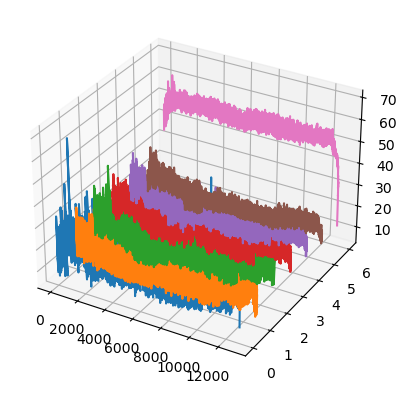

In [4]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')

print(current_tracks[0]["contrast"].shape)
print(tr_0[1].shape)

# # print(tr_0[1])

# for i in tr_0[1]:
#     print(i)

print(tr_0[1][begin_samp:end_samp])
print(np.arange(begin_samp, end_samp))

for idx, x in enumerate(tr_0):
    ax.plot(np.arange(begin_samp, end_samp), tr_0[idx], zs=(idx), zdir='y', label="tr_0[1]")

In [48]:
import math
import sklearn.metrics
import pandas as pd
from scipy.spatial.distance import pdist,squareform

current_comparisons = np.array([])

def round_down_nearest_ten(input):
    return math.floor(input/10) * 10

def create_similarity_matrix(iter_val="off", mode="each"):

    current_comparisons = []

    track_count = len(current_tracks)
    # print("[SIMILARITY] track_count", track_count)

    tracks_r_response = current_tracks
    # print("[SIMILARITY] tracks_r_response", tracks_r_response)

    # create similarity comparison
    comparisons_to_make = [
        {
            "type": "contrast",
            "tolerance": -2,
            "colour": "#DE3C1A"
        },
        # {
        #     "type": "bandwidth",
        #     "tolerance": -2,
        #     "colour": "#DE3C1A"
        # },
    ]

    ## comparison logic
    # print("[SIMILARITY] Starting comparison logic...")

    if iter_val != "off":
        if mode == "each":
            s_loop = range(iter_val)
        elif mode == "all":
            s_loop = range(track_count)
    else:
        s_loop = range(track_count)

    for n in comparisons_to_make:
        s1 = []
        for idx, i in enumerate(s_loop):
            s2 = []
            avgs = []
            for j in range(track_count):
                breaking = False

                # for x in current_comparisons:
                #     if ((x['target'] == tracks_r_response[i]["_id"]) & (x['source'] == tracks_r_response[j]["_id"])):
                #         print("[SIMILARITY] Similarity already exists in reverse, skipping...")
                #         breaking = True

                if breaking == True:
                    continue
                
                if(tracks_r_response[i] == tracks_r_response[j]):
                    print("")
                else:
                    comp = n['type']
                    rounding_decimals = n['tolerance']

                    similarity_score_a = 0
                    similarity_score_b = 0

                    start = 0
                    dista = 4000
                    leng = start+dista

                    print("fff",tracks_r_response[i][comp].shape)

                    i_arr = tracks_r_response[i][comp][0:7,start:leng]
                    j_arr = tracks_r_response[j][comp][0:7,start:leng]

                    # print("i_arr",i_arr)
                    # print("j_arr",j_arr)
                    
                    n_frame = np.zeros((7,dista), dtype=int)
                    print("frame shape", n_frame.shape)

                    for xdx, x in enumerate(i_arr):
                        for ydx, y in enumerate(x):
                            # print("ydx",ydx)
                            n_frame[xdx][ydx] = round_to_nearest(y,-1)

                    for xdx, x in enumerate(j_arr):
                        for ydx, y in enumerate(x):
                            if n_frame[xdx][ydx] != round_to_nearest(y,-1):
                                n_frame[xdx][ydx] = round_to_nearest(y,-1)

                    dist = numpy.linalg.norm(j_arr-i_arr)
                    print("dist",dist)

                    print("n_frame",n_frame)

                    s_dist = sklearn.metrics.pairwise.euclidean_distances(j_arr, i_arr)
                    s_dist_avg = np.average(s_dist)
                    print("s_dist_avg",s_dist_avg)

                    sqrt_s_dist_avg = math.sqrt(s_dist_avg)
                    avgs.append(s_dist_avg)
                    print("sqrt_s_dist_avg",sqrt_s_dist_avg)

                    x_frame = n_frame.tolist()

                    if(round_down_nearest_ten(sqrt_s_dist_avg) <= 29):
                        print("[ROUNDED IS]", round_down_nearest_ten(s_dist_avg))
                        print("[SIMILARITY]",comp,"match")

                        # composed_similarity = {
                        #     "id": comp + " " + tracks_r_response[i]["fileName"] + " " + tracks_r_response[j]["fileName"],
                        #     "source": tracks_r_response[i]["_id"],
                        #     "target": tracks_r_response[j]["_id"],
                        #     "label": comp,
                        #     "colour": n['colour']
                        # }

                        # db_post_similarity(composed_similarity)
                        # current_comparisons.append(composed_similarity)

                    print("avgs for",current_tracks[i]["fileName"],"and",current_tracks[j]["fileName"],comp,"are",avgs)

            s2.append([x_frame])
            print("s2...")
        s1.append(s2)
        print("s1...")
    current_comparisons.append(s1)
    print("curr...")

    print("[SIMILARITY] Finished comparison logic: mode",mode,"and iter_val",iter_val)
    print(current_comparisons)

create_similarity_matrix(mode="all")


fff (7, 12920)
frame shape (7, 4000)
dist 1037.543599566367
n_frame [[30 30 20 ... 20 20 20]
 [10 10 20 ... 10 10 10]
 [20 20 20 ... 20 10 20]
 ...
 [20 20 20 ... 20 20 20]
 [20 20 20 ... 20 10 10]
 [40 50 50 ... 50 50 40]]
s_dist_avg 826.3152186450548
sqrt_s_dist_avg 28.7456991330017
[ROUNDED IS] 820
[SIMILARITY] contrast match
avgs for august 1 master 1.wav and DVDR master 2.wav contrast are [826.3152186450548]
fff (7, 12920)
frame shape (7, 4000)
dist 1109.802274753917
n_frame [[10 10 10 ... 20 20 30]
 [10 10 10 ... 10 20 10]
 [10 10 10 ... 30 30 30]
 ...
 [10 10 10 ... 20 20 20]
 [10 10 20 ... 20 20 20]
 [20 20 20 ... 50 50 50]]
s_dist_avg 827.7033861941818
sqrt_s_dist_avg 28.76983465705324
[ROUNDED IS] 820
[SIMILARITY] contrast match
avgs for august 1 master 1.wav and bellzz master 1.wav contrast are [826.3152186450548, 827.7033861941818]
s2...
fff (7, 15995)
frame shape (7, 4000)
dist 1037.543599566367
n_frame [[10 10 20 ... 20 20 40]
 [10 10 20 ... 10 10 10]
 [10 20 20 ... 30 2